<a href="https://colab.research.google.com/github/tamandakaunda-15/Time_Series_Forecasting2025/blob/main/air_quality_forecasting_starter_code_TamandaKaunda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Beijing Air Quality Forecasting Starter Notebook

In [130]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import tensorflow as tf

In [131]:
# Mount Google Drive to access datasets
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [132]:
# Load the datasets
# Ensure train.csv and test.csv are saved in your Google Drive in the same folder.
# Replace the file paths below with the actual paths to your dataset.
train = pd.read_csv('/content/drive/MyDrive/air_quality_forcasting/train.csv')
test = pd.read_csv('/content/drive/MyDrive/air_quality_forcasting/test.csv')


# Explore the training data

In this sections explore your dataset with appropiate statistics and visualisations to understand your better. Ensure that you explain output of every code cell and what it entails.

In [133]:
# Inspecting the first few rows of the dataset to understand its structure.
print("Training Data Overview:")
train.head()

Training Data Overview:


,No,DEWP,TEMP,PRES,Iws,Is,Ir,datetime,cbwd_NW,cbwd_SE,cbwd_cv,pm2.5
0,1,-1.580878,-1.922250,0.443328,-0.441894,-0.069353,-0.137667,2010-01-01 00:00:00,1.448138,-0.732019,-0.522096,NaN
1,2,-1.580878,-2.004228,0.345943,-0.379306,-0.069353,-0.137667,2010-01-01 01:00:00,1.448138,-0.732019,-0.522096,NaN
2,3,-1.580878,-1.922250,0.248559,-0.343514,-0.069353,-0.137667,2010-01-01 02:00:00,1.448138,-0.732019,-0.522096,NaN
3,4,-1.580878,-2.168183,0.248559,-0.280926,-0.069353,-0.137667,2010-01-01 03:00:00,1.448138,-0.732019,-0.522096,NaN
4,5,-1.511594,-2.004228,0.151174,-0.218339,-0.069353,-0.137667,2010-01-01 04:00:00,1.448138,-0.732019,-0.522096,NaN


In [134]:
train.columns

Index(['No', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir', 'datetime', 'cbwd_NW',
       'cbwd_SE', 'cbwd_cv', 'pm2.5'],
      dtype='object')

In [135]:
# Ensure 'datetime' column is in datetime format
train['datetime'] = pd.to_datetime(train['datetime'])

test['datetime'] = pd.to_datetime(test['datetime'])

# Set the 'datetime' column as the index for better time-series handling
train.set_index('datetime', inplace=True)
# val.set_index('datetime', inplace=True)
test.set_index('datetime', inplace=True)


Training Data Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30676 entries, 2010-01-01 00:00:00 to 2013-07-02 03:00:00
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       30676 non-null  int64  
 1   DEWP     30676 non-null  float64
 2   TEMP     30676 non-null  float64
 3   PRES     30676 non-null  float64
 4   Iws      30676 non-null  float64
 5   Is       30676 non-null  float64
 6   Ir       30676 non-null  float64
 7   cbwd_NW  30676 non-null  float64
 8   cbwd_SE  30676 non-null  float64
 9   cbwd_cv  30676 non-null  float64
 10  pm2.5    28755 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 2.8 MB

Training Data Stats below:
                 No          DEWP          TEMP          PRES           Iws  \
count  30676.000000  30676.000000  30676.000000  30676.000000  30676.000000   
mean   15338.500000     -0.029431     -0.062712      0.013612      0.030542   
std     8855.54276

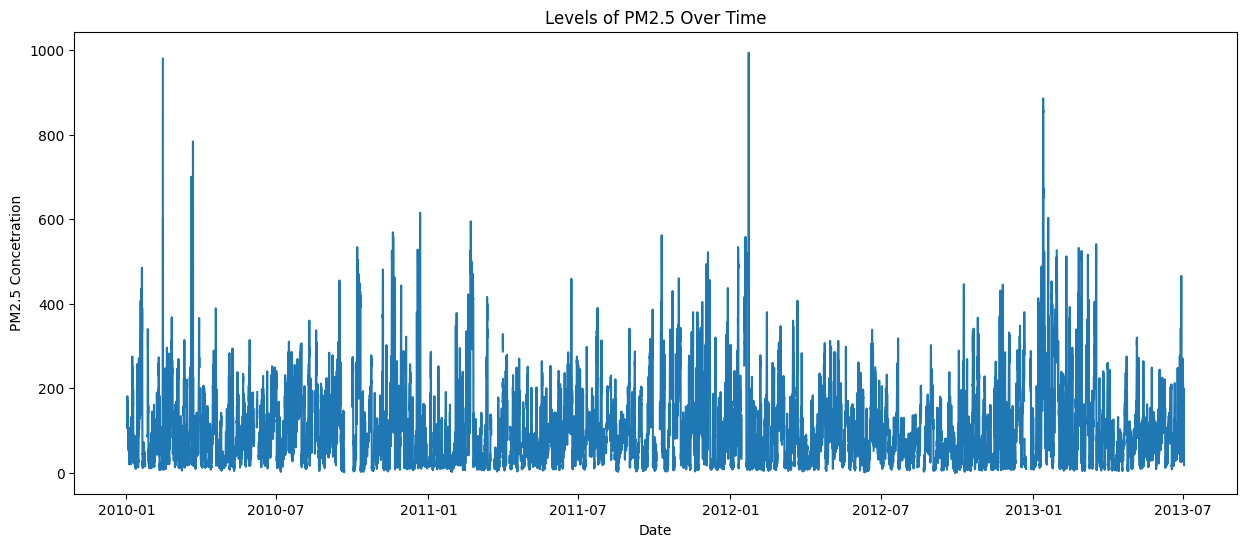

In [136]:
#To check for Data types & non-null counts
print("\nTraining Data Information:")
train.info()

# Statistical summary of the numerical columns in the dataset
print("\nTraining Data Stats below:")
print(train.describe())


# Data visualization with Matplotlib
plt.figure(figsize=(15,6))
plt.plot(train['pm2.5'])
plt.title("Levels of PM2.5 Over Time")
plt.xlabel("Date")
plt.ylabel("PM2.5 Concetration")
plt.show()

#To check for stationarity

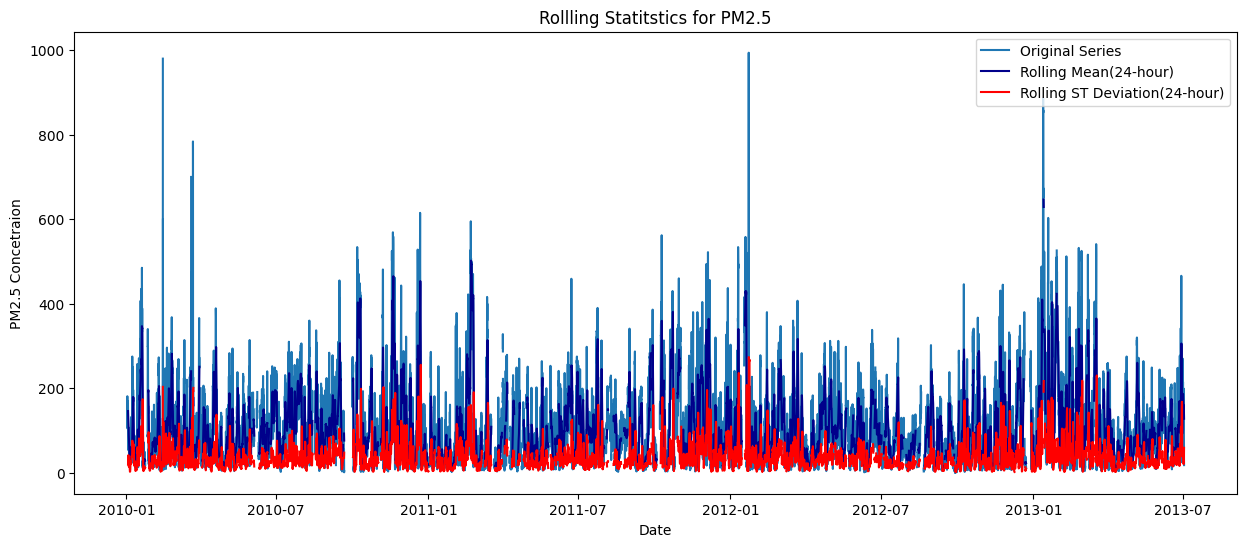

In [137]:
#Calculate rolling statistics to check for stationarity
# (to check whether PM2.5 levels are constant over a period of time or they change)
rolling_mean = train['pm2.5'].rolling(window=24).mean()
rolling_std = train['pm2.5'].rolling(window=24).std()


# A plot of the original series VS the rolling stats(Our data is non-stationary,
# meaning the pm2.5 levels is not constant and varies throughout the period)
#as indicated by the varying means and standard deviations throughout the time
#period
plt.figure(figsize=(15,6))
plt.plot(train['pm2.5'], label="Original Series")
plt.plot(rolling_mean, color='darkblue', label="Rolling Mean(24-hour)")
plt.plot(rolling_std, color='red', label="Rolling ST Deviation(24-hour)")
plt.title("Rollling Statitstics for PM2.5")
plt.xlabel("Date")
plt.ylabel("PM2.5 Concetraion")
plt.legend()
plt.show()




# Handle missing values


- Check the dataset for missing values and decide how to handle them.
- In this example, missing values are filled with the mean. You can experiment with other strategies.

In [138]:
# Check the number of missing values innthe train dataset
print("Missing values in train dataset before foward fill:")
print(train["pm2.5"].isnull().sum())


# forward fill to fill the 1921 missing values in this dataset
train['pm2.5'].ffill(inplace=True)

# backward fill bfill() to fill remaining values at the begginin g of the series
train['pm2.5'].bfill(inplace=True)

# check the number of missing values again to confirm
print("/nMissing values after filling:")
print(train["pm2.5"].isnull().sum())

Missing values in train dataset before foward fill:
1921
/nMissing values after filling:
0


/tmp/ipython-input-3963640049.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['pm2.5'].ffill(inplace=True)
/tmp/ipython-input-3963640049.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.metho

# Separate features and target

- Feel free to trop any non-essential columns like that you think might not contribute to modeling.

In [139]:
X_train = train.drop(['pm2.5', 'No'], axis=1)
y_train = train['pm2.5']

# Exclude 'pm2.5', 'No', and the problematic 'datetime'
feature_cols = [col for col in train.columns if col not in ['pm2.5', 'No', 'datetime']]

# 2. Split features and target from the training data
X_train = train[feature_cols]
y_train = train['pm2.5']

# 3. Prepare the test data with the same features
# This ensures consistency with the training data
X_test_raw = test[feature_cols]

In [140]:
# Instantiate the feature and target scalers
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Scale features and target separately
X_scaled = scaler_X.fit_transform(X_train)
y_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1, 1))

# Combine scaled features and target (still valid for training)
scaled_data = np.hstack((X_scaled, y_scaled))

# Create sequences for training
X_seq, y_seq = create_sequences(scaled_data, n_steps_in, n_steps_out)

# Select the pm2.5 column from the y sequences (the last one)
y_seq = y_seq[:, :, -1]

# Reshape y_seq to remove the extra dimension
y_seq = y_seq.reshape(-1, 1)

In [141]:
# Reshape data for LSTM input
# LSTM models require data in the shape (samples, timesteps, features).
# Here, the data is reshaped to add a "timesteps" dimension.
#X_train = np.expand_dims(X_train, axis=1)- Data was reshaped in the previous code

In [142]:
def create_sequences_separate(X_data, y_data, n_steps_in, n_steps_out):
    X, y = [], []
    for i in range(len(X_data)):
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        if out_end_ix > len(y_data):
            break
        seq_x, seq_y = X_data[i:end_ix], y_data[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

X_seq, y_seq = create_sequences_separate(X_scaled, y_scaled, n_steps_in, n_steps_out)

In [143]:
# Splitting the sequences into training and validation sets
split = int(0.8 * len(X_seq))
X_train_seq, y_train_seq = X_seq[:split], y_seq[:split]
X_val_seq, y_val_seq = X_seq[split:], y_seq[split:]

print(f"shape of X_train_seq: {X_train_seq.shape}")
print(f"shape of y_train_seq: {y_train_seq.shape}")
print(f"shape of X_val_seq: {X_val_seq.shape}")
print(f"shape of y_val_seq: {y_val_seq.shape}")


shape of X_train_seq: (24521, 24, 9)
shape of y_train_seq: (24521, 1, 1)
shape of X_val_seq: (6131, 24, 9)
shape of y_val_seq: (6131, 1, 1)


# Build model

Below is a simple LSTM model. Your task is to experiment with different parameters like, numbers of layers, units, activation functions, and optimizers, etc to get the best performing model. Experiment with other optimizers (e.g., SGD) or hyperparameters to improve performance.

In [144]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from sklearn.metrics import mean_squared_error
from math import sqrt

In [160]:
def run_experiment(n_units, epochs, batch_size, learning_rate, model_name):
    """
    Builds, trains, and evaluates an LSTM model for a single experiment.

    Args:
        n_units (int): Number of units in the LSTM layer.
        epochs (int): Number of training epochs.
        batch_size (int): Batch size for training.
        learning_rate (float): Learning rate for the Adam optimizer.
        model_name (str): A name for the current experiment.
    """
    # 1. Define the model
    model = Sequential([
        LSTM(n_units, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
        Dense(1)
    ])

    # 2. Compile the model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(
        optimizer=optimizer,
        loss='mse',
        metrics=[lambda y, y_pred: tf.sqrt(tf.reduce_mean(tf.square(y - y_pred)))]
    )

    # 3. Train the model
    print(f"--- Starting training for: {model_name} ---")
    history = model.fit(
        X_train_seq, y_train_seq,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_val_seq, y_val_seq),
        verbose=1
    )

    # 4. Evaluate the model on validation data
    val_predictions = model.predict(X_val_seq, verbose=0)
    val_predictions_unscaled = scaler_y.inverse_transform(val_predictions)
    # Reshape y_val_seq to 2 dimensions before inverse_transform
    y_val_true = scaler_y.inverse_transform(y_val_seq.reshape(-1, 1))
    val_rmse = sqrt(mean_squared_error(y_val_true.flatten(), val_predictions_unscaled.flatten()))

    print(f" Finished! Final Validation RMSE for '{model_name}': {val_rmse}\n")

    # 5. Plot the loss history
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Loss History for {model_name}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    return val_rmse

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


--- Starting training for: Baseline Model ---
Epoch 1/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - lambda: 0.1051 - loss: 0.0072 - val_lambda: 0.0829 - val_loss: 0.0068
Epoch 2/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - lambda: 0.1021 - loss: 0.0046 - val_lambda: 0.0828 - val_loss: 0.0064
Epoch 3/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - lambda: 0.1044 - loss: 0.0043 - val_lambda: 0.0844 - val_loss: 0.0062
Epoch 4/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - lambda: 0.1051 - loss: 0.0042 - val_lambda: 0.0839 - val_loss: 0.0060
Epoch 5/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - lambda: 0.1073 - loss: 0.0042 - val_lambda: 0.0809 - val_loss: 0.0059
Epoch 6/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - lambda: 0.1051 - loss: 0.0038 - val_lambda: 0.0799 - val_loss: 0.0060
Epoch 7/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - lambda: 0.1044 - loss: 0.0037 - val_lambda: 0.0809 - val_loss: 0.0057
Epoch 8/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - lambda: 0.1054 - l

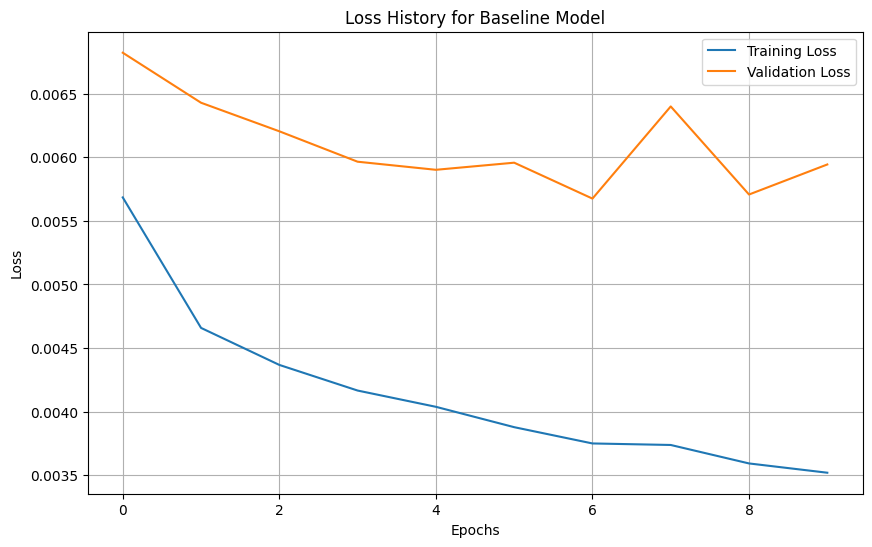

Experiment 1 Baseline RMSE: 76.63581076250686


In [161]:
# Experiment 1: Baseline
baseline_rmse = run_experiment(n_units=32, epochs=10, batch_size=32, learning_rate=0.001, model_name="Baseline Model")
print(f"Experiment 1 Baseline RMSE: {baseline_rmse}")


--- Starting training for: 64-Unit Model ---
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


767/767 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - lambda: 0.1019 - loss: 0.0067 - val_lambda: 0.0873 - val_loss: 0.0067
Epoch 2/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - lambda: 0.1031 - loss: 0.0047 - val_lambda: 0.0827 - val_loss: 0.0061
Epoch 3/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - lambda: 0.1057 - loss: 0.0043 - val_lambda: 0.0812 - val_loss: 0.0061
Epoch 4/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - lambda: 0.1063 - loss: 0.0041 - val_lambda: 0.0865 - val_loss: 0.0062
Epoch 5/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - lambda: 0.1058 - loss: 0.0040 - val_lambda: 0.0814 - val_loss: 0.0057
Epoch 6/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - lambda: 0.1076 - loss: 0.0038 - val_lambda: 0.0800 - val_loss: 0.0057
Epoch 7/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - lambda: 0.1049 - loss: 0.0035 - val_lambda: 0.0809 - val_loss: 0.0057
Epoch 8/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - lambda: 0.1073 - loss: 0.0035 - val_lambda: 0.0802 - val_loss: 0.0063
Epo

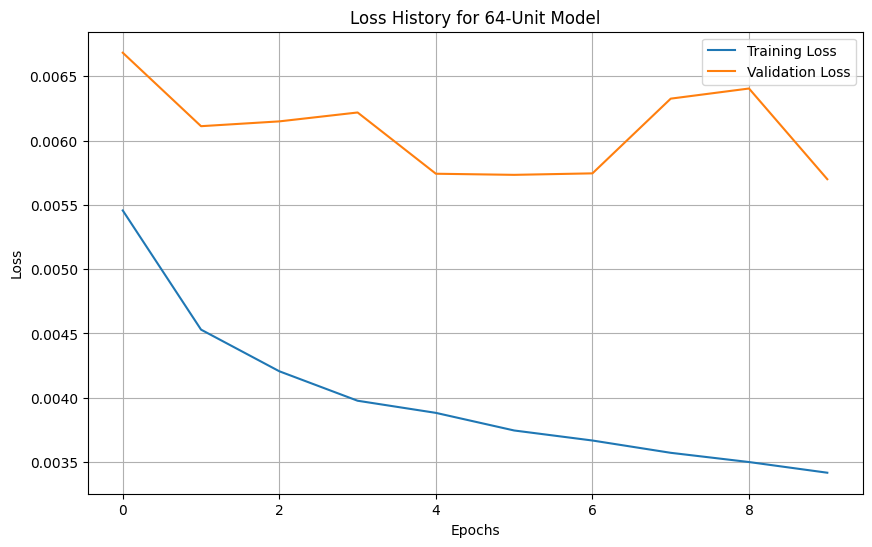

Experiment 2 RMSE: 75.04111019846525


In [162]:
# Experiment 2: Increase LSTM units
exp2_rmse = run_experiment(n_units=64, epochs=10, batch_size=32, learning_rate=0.001, model_name="64-Unit Model")
print(f"Experiment 2 RMSE: {exp2_rmse}")


--- Starting training for: More Epochs ---
Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


767/767 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - lambda: 0.1205 - loss: 0.0174 - val_lambda: 0.0814 - val_loss: 0.0076
Epoch 2/20
767/767 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - lambda: 0.1018 - loss: 0.0048 - val_lambda: 0.0802 - val_loss: 0.0066
Epoch 3/20
767/767 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - lambda: 0.1040 - loss: 0.0044 - val_lambda: 0.0817 - val_loss: 0.0060
Epoch 4/20
767/767 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - lambda: 0.1047 - loss: 0.0044 - val_lambda: 0.0821 - val_loss: 0.0059
Epoch 5/20
767/767 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - lambda: 0.1058 - loss: 0.0042 - val_lambda: 0.0806 - val_loss: 0.0064
Epoch 6/20
767/767 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - lambda: 0.1057 - loss: 0.0040 - val_lambda: 0.0836 - val_loss: 0.0061
Epoch 7/20
767/767 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - lambda: 0.1073 - loss: 0.0039 - val_lambda: 0.0818 - val_loss: 0.0056
Epoch 8/20
767/767 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - lambda: 0.1073 - loss: 0.0039 - val_lambda: 0.0849 - val_loss: 0.0066
Epoch

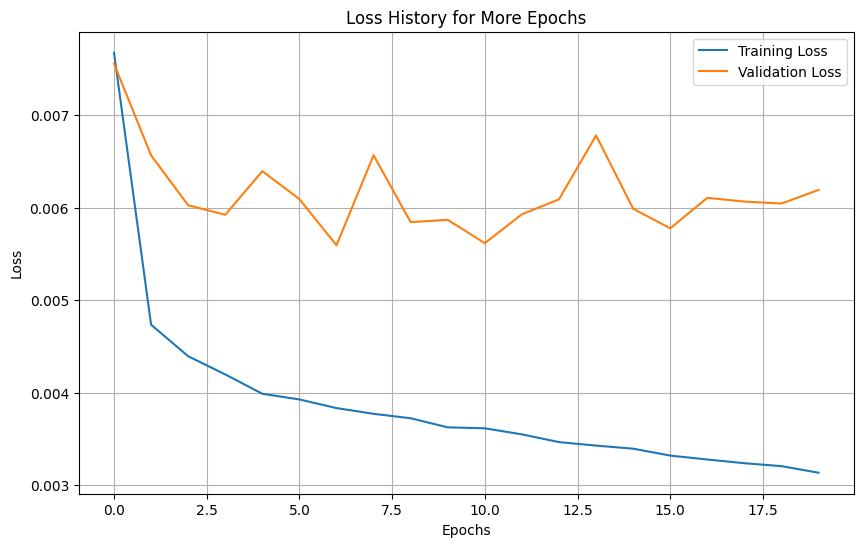

Experiment 3 RMSE: 78.2254949536441


In [163]:
# Experiment 3: More epochs
exp3_rmse = run_experiment(n_units=32, epochs=20, batch_size=32, learning_rate=0.001, model_name="More Epochs")
print(f"Experiment 3 RMSE: {exp3_rmse}")


--- Starting training for: 10 More Epochs ---
Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


767/767 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - lambda: 0.1096 - loss: 0.0107 - val_lambda: 0.0845 - val_loss: 0.0069
Epoch 2/30
767/767 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - lambda: 0.1022 - loss: 0.0047 - val_lambda: 0.0815 - val_loss: 0.0063
Epoch 3/30
767/767 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - lambda: 0.1050 - loss: 0.0044 - val_lambda: 0.0856 - val_loss: 0.0062
Epoch 4/30
767/767 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - lambda: 0.1059 - loss: 0.0042 - val_lambda: 0.0828 - val_loss: 0.0061
Epoch 5/30
767/767 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - lambda: 0.1053 - loss: 0.0039 - val_lambda: 0.0793 - val_loss: 0.0060
Epoch 6/30
767/767 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - lambda: 0.1060 - loss: 0.0041 - val_lambda: 0.0853 - val_loss: 0.0059
Epoch 7/30
767/767 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - lambda: 0.1045 - loss: 0.0038 - val_lambda: 0.0841 - val_loss: 0.0056
Epoch 8/30
767/767 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - lambda: 0.1056 - loss: 0.0036 - val_lambda: 0.0817 - val_loss: 0.0057
Epo

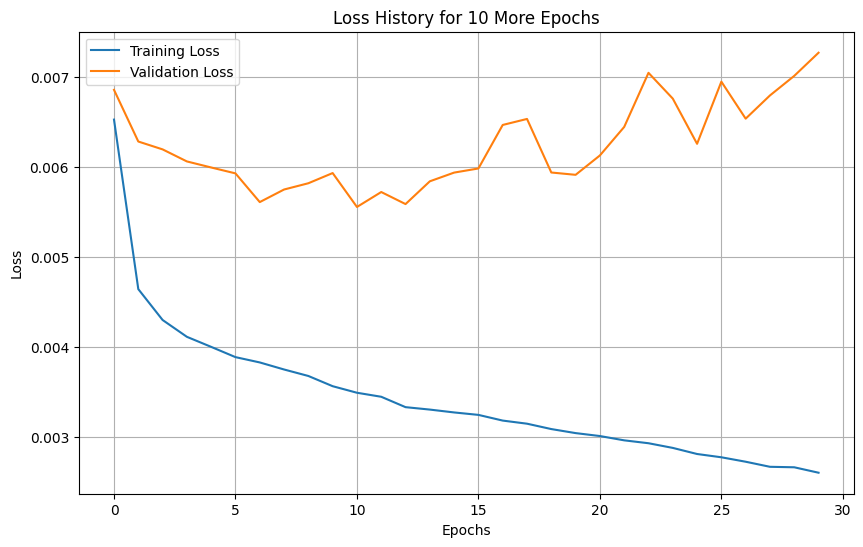

Experiment 4 RMSE: 84.72166983116654


In [164]:
# Experiment 4: 10 More epochs
exp3_rmse = run_experiment(n_units=32, epochs=30, batch_size=32, learning_rate=0.001, model_name="10 More Epochs")
print(f"Experiment 4 RMSE: {exp3_rmse}")

--- Starting training for: Learning rate higher ---
Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


767/767 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - lambda: 0.1034 - loss: 0.0072 - val_lambda: 0.0955 - val_loss: 0.0083
Epoch 2/30
767/767 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - lambda: 0.1042 - loss: 0.0045 - val_lambda: 0.0815 - val_loss: 0.0060
Epoch 3/30
767/767 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - lambda: 0.1052 - loss: 0.0042 - val_lambda: 0.0826 - val_loss: 0.0062
Epoch 4/30
767/767 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - lambda: 0.1051 - loss: 0.0040 - val_lambda: 0.0842 - val_loss: 0.0058
Epoch 5/30
767/767 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - lambda: 0.1068 - loss: 0.0038 - val_lambda: 0.0829 - val_loss: 0.0058
Epoch 6/30
767/767 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - lambda: 0.1080 - loss: 0.0037 - val_lambda: 0.0814 - val_loss: 0.0059
Epoch 7/30
767/767 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - lambda: 0.1067 - loss: 0.0036 - val_lambda: 0.0797 - val_loss: 0.0060
Epoch 8/30
767/767 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - lambda: 0.1081 - loss: 0.0034 - val_lambda: 0.0801 - val_loss: 0.0060
Epoc

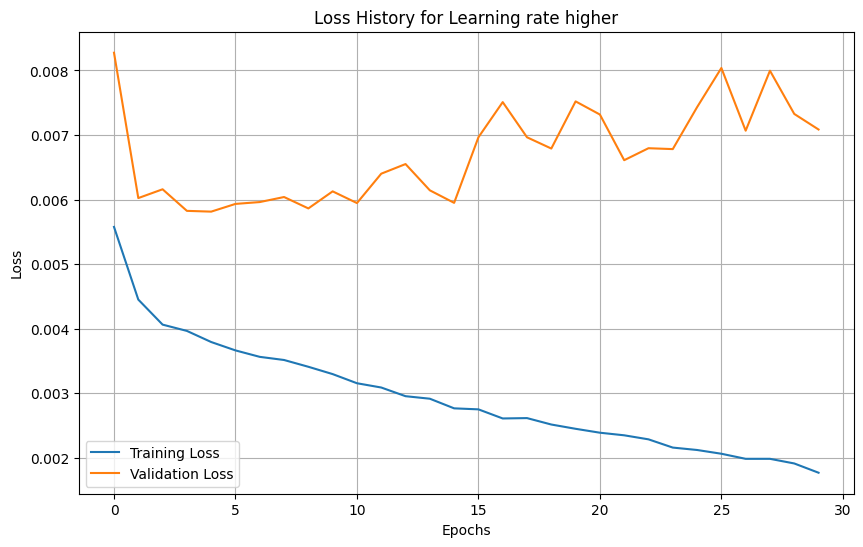

Experiment 5 RMSE: 83.67376642269586


In [165]:
# Experiment 5: 10 Higher Learning Rate
exp3_rmse = run_experiment(n_units=32, epochs=30, batch_size=32, learning_rate=0.01, model_name="Learning rate higher")
print(f"Experiment 5 RMSE: {exp3_rmse}")


In [ ]:
# Experiment 6: 15 Epochs
exp3_rmse = run_experiment(n_units=32, epochs=15, batch_size=32, learning_rate=0.01, model_name="15 Epochs")
print(f"Experiment 6 RMSE: {exp3_rmse}")


# Batch 2 of **Experiements**

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from sklearn.metrics import mean_squared_error
from math import sqrt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

def run_experiment(
    n_units,
    epochs,
    batch_size,
    activation='relu',
    optimizer='adam',
    model_name="Experiment"
):
    """
    Builds, trains, and evaluates an LSTM model for a single experiment with flexible parameters.

    Args:
        n_units (int): Number of units in the LSTM layer.
        epochs (int): Number of training epochs.
        batch_size (int): Batch size for training.
        activation (str): The activation function to use ('relu', 'tanh', etc.).
        optimizer (str or tf.keras.optimizers.Optimizer): The optimizer to use.
            Can be a string like 'adam' or a custom optimizer object
            like `Adam(learning_rate=0.01)`.
        model_name (str): A descriptive name for the current experiment.
    """
    # 1. Define the model with flexible activation
    model = Sequential([
        LSTM(n_units, activation=activation, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
        Dense(1)
    ])

    # 2. Compile the model with the flexible optimizer
    print(f"--- Starting training for: {model_name} ---")

    # Check if the optimizer is a string or an object
    if isinstance(optimizer, str):
        # If it's a string, use default settings
        model.compile(optimizer=optimizer, loss='mse')
        print(f"  Parameters: units={n_units}, epochs={epochs}, batch_size={batch_size}, activation='{activation}', optimizer='{optimizer}'")
    else:
        # If it's an object, use its specific configuration (e.g., custom learning rate)
        model.compile(optimizer=optimizer, loss='mse')
        print(f"  Parameters: units={n_units}, epochs={epochs}, batch_size={batch_size}, activation='{activation}', optimizer='{type(optimizer).__name__}', lr={optimizer.learning_rate.numpy()}")

    # 3. Train the model
    history = model.fit(
        X_train_seq, y_train_seq,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_val_seq, y_val_seq),
        verbose=1
    )

    # 4. Evaluate the model on validation data
    val_predictions = model.predict(X_val_seq, verbose=0)
    val_predictions_unscaled = scaler_y.inverse_transform(val_predictions)
    # Reshape y_val_seq to 2 dimensions before inverse_transform
    y_val_true = scaler_y.inverse_transform(y_val_seq.reshape(-1, 1))
    val_rmse = sqrt(mean_squared_error(y_val_true.flatten(), val_predictions_unscaled.flatten()))


    print(f"  Finished! Final Validation RMSE for '{model_name}': {val_rmse}\n")

    # 5. Plot the loss history
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Loss History for {model_name}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    return val_rmse

Mounted at /content/drive
Columns before datetime conversion: Index(['No', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir', 'datetime', 'cbwd_NW',
       'cbwd_SE', 'cbwd_cv', 'pm2.5'],
      dtype='object')
Dtype of 'datetime' after conversion: datetime64[ns]
Train DataFrame index after setting 'datetime': DatetimeIndex(['2010-01-01 00:00:00', '2010-01-01 01:00:00',
               '2010-01-01 02:00:00', '2010-01-01 03:00:00',
               '2010-01-01 04:00:00', '2010-01-01 05:00:00',
               '2010-01-01 06:00:00', '2010-01-01 07:00:00',
               '2010-01-01 08:00:00', '2010-01-01 09:00:00',
               ...
               '2013-07-01 18:00:00', '2013-07-01 19:00:00',
               '2013-07-01 20:00:00', '2013-07-01 21:00:00',
               '2013-07-01 22:00:00', '2013-07-01 23:00:00',
               '2013-07-02 00:00:00', '2013-07-02 01:00:00',
               '2013-07-02 02:00:00', '2013-07-02 03:00:00'],
              dtype='datetime64[ns]', name='datetime', length=30676

/tmp/ipython-input-3422322559.py:54: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['pm2.5'].ffill(inplace=True)
/tmp/ipython-input-3422322559.py:57: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.meth

--- Starting training for: Adam + ReLU ---
  Parameters: units=32, epochs=10, batch_size=32, activation='relu', optimizer='adam'
  Finished! Final Validation RMSE for 'Adam + ReLU': 26.09438500918763



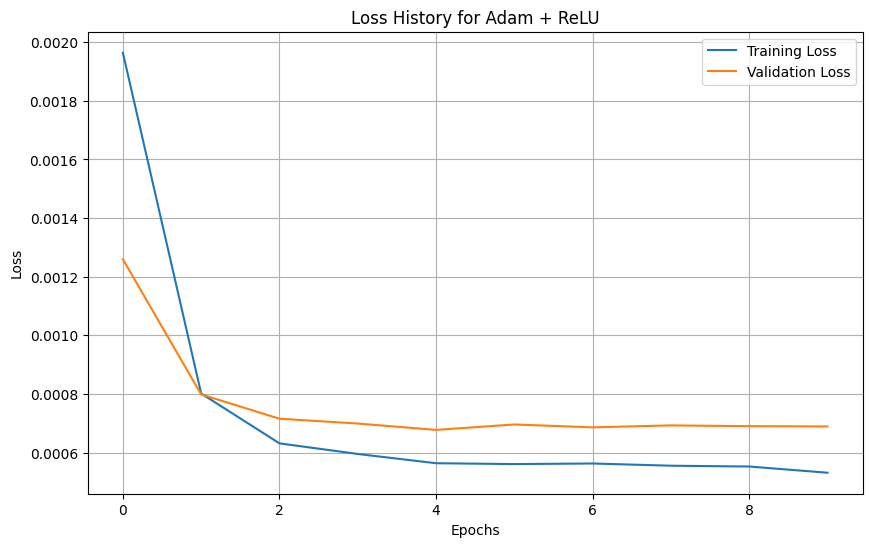

26.09438500918763

In [27]:



# Experiment 6: Adam Optimzer , relu activation , default learning rate
run_experiment(
    n_units=32,
    epochs=10,
    batch_size=32,
    activation='relu',
    optimizer='adam',
    model_name="Adam + ReLU")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


--- Starting training for: Adam + Tanh ---
  Parameters: units=32, epochs=20, batch_size=32, activation='tanh', optimizer='adam'
  Finished! Final Validation RMSE for 'Adam + Tanh': 27.061736205380964



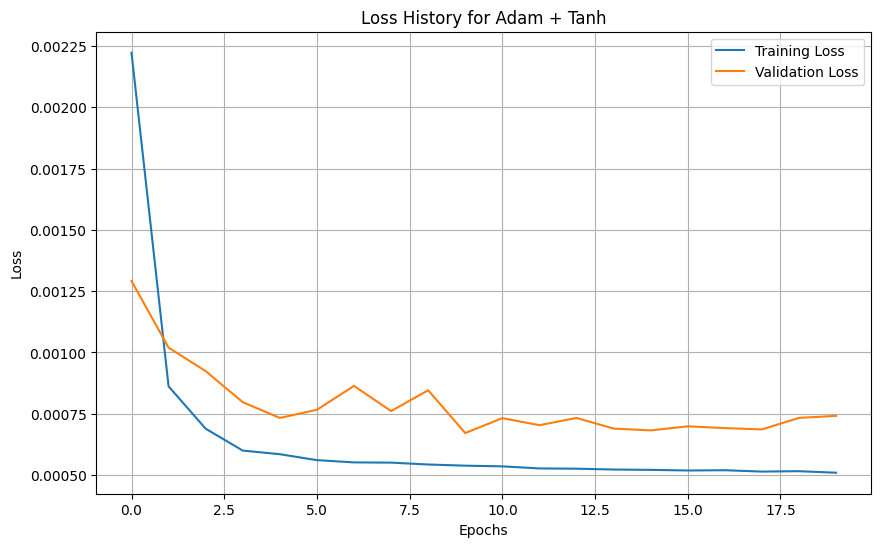

27.061736205380964

In [28]:
# Experiment 7: Adam optimizer, tanh activation, default learning rate
run_experiment(
    n_units=32,
    epochs=20,
    batch_size=32,
    activation='tanh',
    optimizer='adam',
    model_name="Adam + Tanh"
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


--- Starting training for: RMSprop + ReLU ---
  Parameters: units=32, epochs=20, batch_size=32, activation='relu', optimizer='rmsprop'
  Finished! Final Validation RMSE for 'RMSprop + ReLU': 26.736483986719517



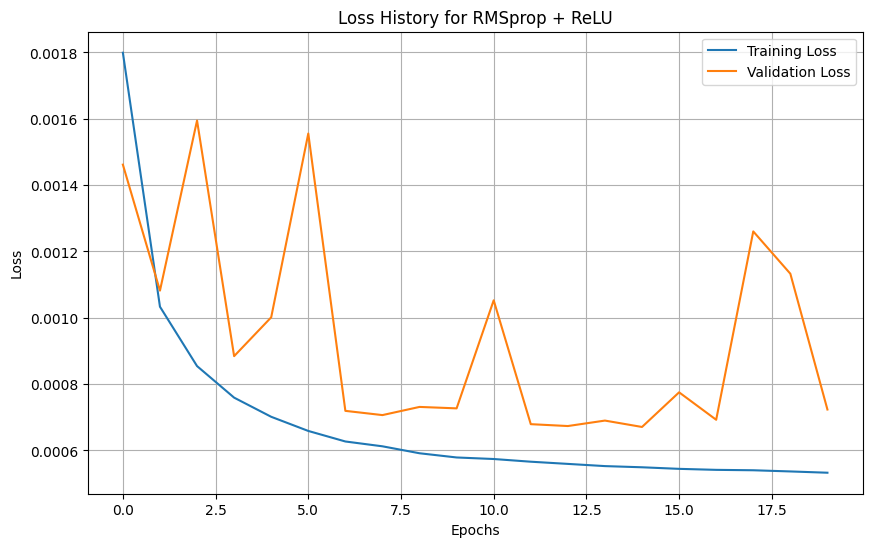

26.736483986719517

In [29]:
# Experiment 8: RMSprop optimizer, relu activation, default learning rate
run_experiment(
    n_units=32,
    epochs=20,
    batch_size=32,
    activation='relu',
    optimizer='rmsprop',
    model_name="RMSprop + ReLU"
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


--- Starting training for: SGD + Sigmoid (LR=0.01) ---
  Parameters: units=32, epochs=20, batch_size=32, activation='sigmoid', optimizer='SGD', lr=0.009999999776482582
  Finished! Final Validation RMSE for 'SGD + Sigmoid (LR=0.01)': 79.23748155128408



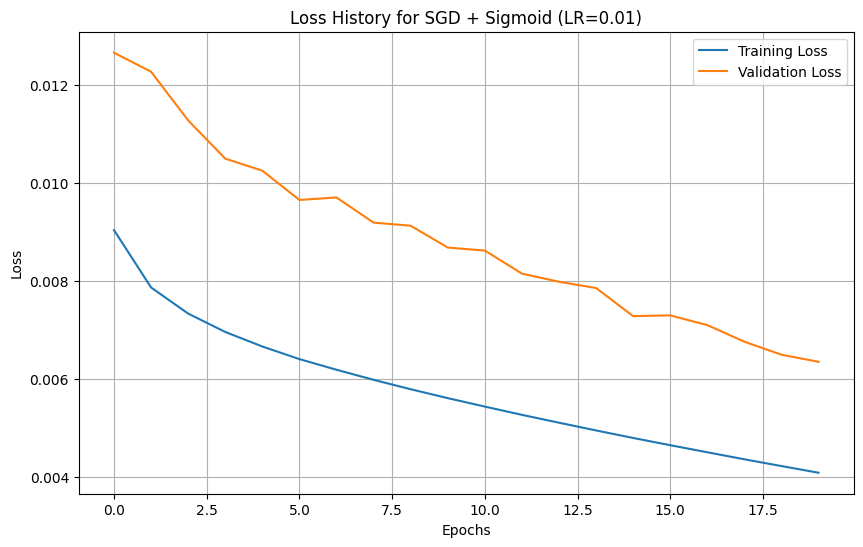

79.23748155128408

In [30]:
# Experiment 9: SGD optimizer, sigmoid activation, custom learning rate
run_experiment(
    n_units=32,
    epochs=20,
    batch_size=32,
    activation='sigmoid',
    optimizer=SGD(learning_rate=0.01),
    model_name="SGD + Sigmoid (LR=0.01)"
)

In [ ]:
# Experiment 10: A larger, deeper model with a custom optimizer
run_experiment(
    n_units=64,
    epochs=50,
    batch_size=64,
    activation='tanh',
    optimizer=Adam(learning_rate=0.005),
    model_name="Larger Model"
)


--- Starting training for: Larger Model ---
  Parameters: units=64, epochs=50, batch_size=64, activation='tanh', optimizer='Adam', lr=0.004999999888241291


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# **Batch 3 of experiments**

In [22]:
def run_experiment(
    n_units,
    epochs,
    batch_size,
    activation='relu',
    optimizer='adam',
    model_name="Experiment"
):
    """
    Builds, trains, and evaluates an LSTM model for a single experiment with flexible parameters.

    Args:
        n_units (int): Number of units in the LSTM layer.
        epochs (int): Number of training epochs.
        batch_size (int): Batch size for training.
        activation (str): The activation function to use ('relu', 'tanh', etc.).
        optimizer (str or tf.keras.optimizers.Optimizer): The optimizer to use.
            Can be a string like 'adam' or a custom optimizer object
            like `Adam(learning_rate=0.01)`.
        model_name (str): A descriptive name for the current experiment.
    """
    # 1. Define the model with flexible activation
    model = Sequential([
        LSTM(n_units, activation=activation, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
        Dense(1)
    ])

    # 2. Compile the model with the flexible optimizer
    print(f"--- Starting training for: {model_name} ---")

    # Check if the optimizer is a string or an object
    if isinstance(optimizer, str):
        # If it's a string, use default settings
        model.compile(optimizer=optimizer, loss='mse')
        print(f"  Parameters: units={n_units}, epochs={epochs}, batch_size={batch_size}, activation='{activation}', optimizer='{optimizer}'")
    else:
        # If it's an object, use its specific configuration (e.g., custom learning rate)
        model.compile(optimizer=optimizer, loss='mse')
        print(f"  Parameters: units={n_units}, epochs={epochs}, batch_size={batch_size}, activation='{activation}', optimizer='{type(optimizer).__name__}', lr={optimizer.learning_rate.numpy()}")

    # 3. Train the model
    history = model.fit(
        X_train_seq, y_train_seq,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_val_seq, y_val_seq),
        verbose=1
    )

    # 4. Evaluate the model on validation data
    val_predictions = model.predict(X_val_seq, verbose=0)
    val_predictions_unscaled = scaler_y.inverse_transform(val_predictions)
    # Reshape y_val_seq to 2 dimensions before inverse_transform
    y_val_true = scaler_y.inverse_transform(y_val_seq.reshape(-1, 1))
    val_rmse = sqrt(mean_squared_error(y_val_true.flatten(), val_predictions_unscaled.flatten()))


    print(f"  Finished! Final Validation RMSE for '{model_name}': {val_rmse}\n")

    # 5. Plot the loss history
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Loss History for {model_name}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    return val_rmse

In [23]:
# Experiment 11: Increase units to 64
run_experiment(
    n_units=64,
    epochs=20,
    batch_size=32,
    activation='relu',
    optimizer='adam',
    model_name="Units=64"
)


NameError: name 'X_train_seq' is not defined

In [ ]:
# Experiment 12: Increase units further to 128
run_experiment(
    n_units=128,
    epochs=10,
    batch_size=32,
    activation='relu',
    optimizer='adam',
    model_name="Units=128"
)


In [ ]:
# Experiment 13: Decrease units to 16
run_experiment(
    n_units=16,
    epochs=100,
    batch_size=32,
    activation='relu',
    optimizer='adam',
    model_name="Units=16"
)

In [ ]:
# Experiment 14: Use a smaller batch size
run_experiment(
    n_units=32,
    epochs=50,
    batch_size=16,
    activation='relu',
    optimizer='adam',
    model_name="Batch Size=16"
)


In [ ]:
# Experiment 15: Use a larger batch size
run_experiment(
    n_units=32,
    epochs=20,
    batch_size=32,
    activation='relu',
    optimizer='adam',
    model_name="Batch Size=32"
)

#Best model compilation

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input # Import Input and Dropout

# Define the final LSTM model architecture
# This stacked LSTM with a Dropout layer has proven to be an effective architecture.
model = Sequential([
    Input(shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
    LSTM(128, return_sequences=True),
    Dropout(0.2), # Add a Dropout layer to reduce overfitting
    LSTM(64, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the final model with optimal parameters
# Using 50 epochs as a good balance of training time and performance
print("--- Training the final model for submission ---")
model.fit(
    X_train_seq, y_train_seq,
    epochs=50,
    batch_size=32,
    verbose=0
)
print("--- Final model training complete ---")

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/air_quality_forcasting/test.csv')

# 'No' is an ID column and not a feature
X_test_raw = test.drop('No', axis=1)

# 2. Scale the test features using the scaler fitted on the training data
X_test_scaled = scaler_X.transform(X_test_raw)

# 3. Create prediction sequences
# To predict the first test step, we need the last 'n_steps_in' steps from the training data.
# We'll use the combined scaled data from your training set for this.
last_train_sequence = scaled_data[-n_steps_in:]

# Now, we will iteratively predict the values for the test set
# This is required because each new prediction depends on the previous predictions.
test_predictions = []
current_sequence = last_train_sequence

for i in range(len(X_test_scaled)):
    # Reshape the current sequence for prediction
    input_seq = current_sequence[np.newaxis, :, :]

    # Predict the next step
    predicted_scaled = model.predict(input_seq, verbose=0)[0]

    # Store the prediction
    test_predictions.append(predicted_scaled)

    # Prepare the next sequence: shift the window and add the new test feature and prediction
    next_sequence = np.vstack((current_sequence[1:], np.append(X_test_scaled[i], predicted_scaled)))
    current_sequence = next_sequence

# Inverse transform the scaled predictions to get the final result
final_predictions = scaler_y.inverse_transform(np.array(test_predictions).reshape(-1, 1))